# HW 9

## Question 1
Given the following LP:

$
\begin{align} \\
\text{max } &  2x_1 + x_2 + 4x_3 + 15x_4 \\
\text{s.t. } & 4x_1 + x_2 + 2x_3 + 3x_4 \le 700 \\
& 4x_1 + 2x_2 + x_3 + 5x_4 \le 700 \\
& x_1, x_2, x_3, x_4 \ge 0 \\
\end{align}
$

#### 1. Form the dual minimization problem.
The given LP is a maximization therefore the dual will be a minimization problem.  This leads to a dual that is minimizing an upper bound for the given LP.  Furthermore, by Strong Duality, the solution to the dual LP is also as solution to the primal (given) LP.

The dual of the given LP is:

$
\begin{align} \\
\text{min } &  700y_1 + 700y_2 \\
\text{s.t. } & 4y_1 + 4y_2 \ge 2 \\
& y_1 + 2y_2 \ge 1 \\
& 2y_1 + y_2 \ge 4 \\
& 3y_1 + 5y_2 \ge 15 \\
& y_1, y_2 \ge 0 \\
\end{align}
$

#### 2. Draw the feasible region of your dual problem.

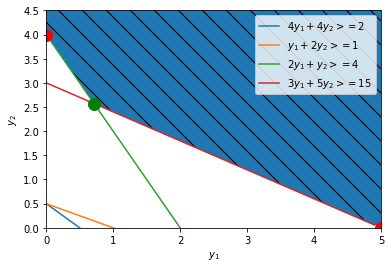

In [18]:
#plot the solution using matplotlib
import matplotlib.pyplot as plt
import numpy as np

# x-values for our plot
xmax = 5.0
ymax = 4.5
x = np.arange(0, xmax, 0.1)

# the constraints to plot
y1 = 2.  / 4. - 4.*x / 4.
y2 = 1.  / 2. - 1.*x / 2.
y3 = 4.  / 1. - 2.*x / 1.
y4 = 15. / 5. - 3.*x / 5.

# plot the constraints
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.plot(x, y1, x, y2, x, y3, x, y4, label='Feasible Region')
plt.legend([r'$4y_1 + 4y_2 >= 2$', r'$y_1 + 2y_2 >= 1$', r'$2y_1 + y_2 >= 4$', r'$3y_1 + 5y_2 >= 15$']);
plt.xlabel(r'$y_1$');
plt.ylabel(r'$y_2$');

# fill in the feasable region (using a polygon)
xp = [0., 0., 5., 5., 5./7.]
yp = [4., 4.5, 4.5, 0., 18./7.]
plt.fill(xp ,yp, hatch='\\');

plt.plot([0., 5.], [4., 0.], 'or', markersize=12, color='red');
plt.plot([5./7.], [18./7.], 'or', markersize=12, color='green');

#### 3. Point out on the graph the optimal solution of the dual problem.
The optimal solution could be at $(y_1,y_2) = (0,4)$ or at $(y_1,y_2) = (5,0)$ or at $(y_1, y_2) = (\frac{5}{7},\frac{18}{7})$. These feasible solutions yield the values $2800, 3500, 2300$ respectively.  Therefore the optimal value is at $(y_1, y_2) = (\frac{5}{7},\frac{18}{7})$.

#### 4. What is the optimal objective value of the dual problem?
The optimal value of the dual problem is $2300$ which is $200$ more than Long John.

#### 5. Which primal constraints must be active at the primal optimal solution?
Excluding non-negativity constraints, the primal LP has 2 constraints whereas the the dual LP has 4 constraints. In the dual LP, we can see that only 2 of the constraints are active in the solution. This corresponds to the variables $x_3$ and $x_4$ in the primal LP.

#### 6. Which primal variables of the optimal primal solution must be zero?
As explained in part 5, 2 of the dual constraints are not active.  This corresponds to the primal variables $x_1$ and $x_2$.  Therefore they have a value of zero.

#### 7. Find out the primal optimal solution.
Given that $x_1$ and $x_2$ are zero, the primal LP reduces to the following simple 2 linear equations:

$2x_3 + 3x_4 = 700$

$x_3 + 5x_4 = 700$

The solution is $(x_1, x_2, x_3, x_4) = (0, 0, 200, 100)$.  This gives an optimal value of $2*0 + 1*0 + 4*200 + 15*100 = 2300$.  This agrees with the dual solution as expected.

For fun, we can also solve with cvxpy.

In [25]:
import cvxpy as cp
import numpy as np

#setup variables and coeffcients
x = cp.Variable(4, 1)
c = np.array([2., 1., 4., 15.])
A = np.array([[4.,1.,2.,3.],[4.,2.,1.,5.]])
b = np.array([700., 700.])

#setup objective and constraints
objective = cp.Maximize(c*x)
constraints = [A*x <= b, x >= 0.]

# solve
prob = cp.Problem(objective, constraints)
result = prob.solve()

# display optimal value of variables
print('The solution status is', prob.status)
print('The optimal value is', round(result))
print('The optimal [x1, x2, x3, x4] is', [round(xx[0,0],2) for xx in x.value])

The solution status is optimal
The optimal value is  2300
The optimal [x1, x2, x3, x4] is  [0.0, 0.0, 200.0, 100.0]


## Question 2

#### 1. Show that when the budget for uncertainty is very large, the budgeted uncertainty is reduced to the box uncertainty set.

The constraint with a budget of $n$ has the following form.

$\sum_{i=0}^{n} \frac{|d_i - \bar{d_i}|}{\hat{d_i}} \le n$

The LHS has n terms:

$\frac{|d_1 - \bar{d_1}|}{\hat{d_1}} + ... + \frac{|d_n - \bar{d_n}|}{\hat{d_n}} \le n$

Each term above is positive, therefore the above will be true if each term is $\le 1$. In other words, the following must be true for each term:

$\frac{|d_1 - \bar{d_1}|}{\hat{d_1}} \le 1 \Leftrightarrow |d_1 - \bar{d_1}| \le \hat{d_1} \text{which gives 2 constraints:  } d_1 - \bar{d_1} \le \hat{d_1} \text{ and } d_1 - \bar{d_1} \ge -\hat{d_1}$

Those 2 constraints can be rearranged as $\bar{d_1} + \hat{d_1} \ge d_1 \text{ and } \bar{d_1} - \hat{d_1} \le d_1$

This is equivalent to the box uncertainty constraint $d_i \in [\bar{d_i} - \hat{d_i}, \bar{d_i} + \hat{d_i}]$

#### 2. Reformulate the given budget as deterministic linear constraints.

We are given $\sum_{i=0}^n x_id_i \le g \forall d_i \in D_{budget}$

This is the same as $\sum_{i=0}^n x_i\frac{w_i}{\hat{d_i}} \le g \forall d_i \in D_{budget}$

This is reformulated as:

$\sum_{i=0}^n x_i\frac{|d_i - \bar{d_i}|}{\hat{d_i}} \le g \\
-d_i \le -\bar{d_i} + \hat{d_i} \\
d_i \le \bar{d_i} + \hat{d_i} \\
-w_i + d_i \le \bar{d_i} \\
-w_i - d_i \le -\bar{d_i}$
